#  Generating Gravitational-Wave Waveforms
This tutorial has been adapted from [Tutorial 1.4](https://github.com/gw-odw/odw-2020/blob/master/Day_1/Tuto%201.4%20Generating%20waveforms.ipynb) of the GW Open Data Workshop \#3

We will be using the [PyCBC](http://github.com/ligo-cbc/pycbc) library, which is used to study gravitational-wave data, find astrophysical sources due to compact binary mergers, and study their parameters. These are some of the same tools that the LIGO and Virgo collaborations use to find gravitational waves in LIGO/Virgo data 

In this tutorial we will walk through how to generate a gravitational waveform for a compact binary merger signal. These are the types of signals that LIGO-Virgo has already detected. The gravitational waves emitted by these types of signals are predictable using General Relativity, although they require advanced numerical methods to solve.

Additional [examples](http://pycbc.org/pycbc/latest/html/#library-examples-and-interactive-tutorials) and module level documentation are [here](http://pycbc.org/pycbc/latest/html/py-modindex.html)

###  Installation  (execute only if running on a cloud platform)

PyCBC is installable through pip. It relies on portions of the [LALSuite]() c-library. A bundled version of this suitable for use with PyCBC is also available on Mac / Linux through pip.

In [ ]:
# -- Uncomment following line if running in Google Colab
#! pip install pycbc lalsuite

**Important:** With Google Colab, you may need to restart the runtime after running the cell above.

### Initialization

In [1]:
%pylab inline

from pycbc.waveform import get_td_waveform

Populating the interactive namespace from numpy and matplotlib


PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


### Generate your first waveform!
A gravitational waveform is the prediction for what the gravitational-wave signal from merging compact objects like black holes and neutron stars should look like, obtained by solving the equations of Einstein's Theory of General Relativity. The wavefrom depends on the properties of the compact objects, like their mass and how far away they are.

Here we'll generate a waveform using one of the available waveform "approximants" from PyCBC. An the "approximant" name just indicates which numerical technique was used to solve Einstein's equations and what assumptions were made during the solution process. These can be generated as a time series using [`get_td_waveform`](http://pycbc.org/pycbc/latest/html/pycbc.waveform.html#pycbc.waveform.waveform.get_td_waveform). There are some additional examples using this interface [here](http://pycbc.org/pycbc/latest/html/waveform.html). The key parameters are the masses of the binary (given in solar masses), the time between samples (in seconds), the starting gravitational-wave frequency (Hz) and the name of the approximant we'd like to generate. A variety of approximants are available that include different physical effects. A full review of the different models is outside of the scope of this tutorial.

In this example, we've chosen to use the 'SEOBNRv4_opt' approximant, which models the waveform of inspiraling and merging black holes. This is an implementation of the model introduced [in this paper](https://arxiv.org/pdf/1611.03703.pdf).

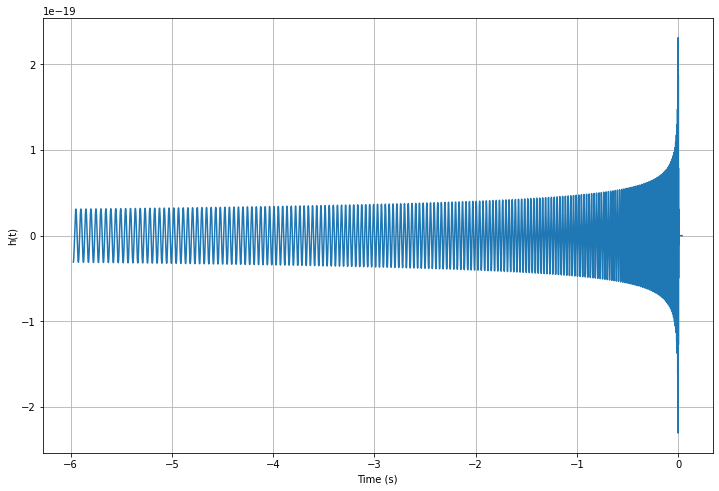

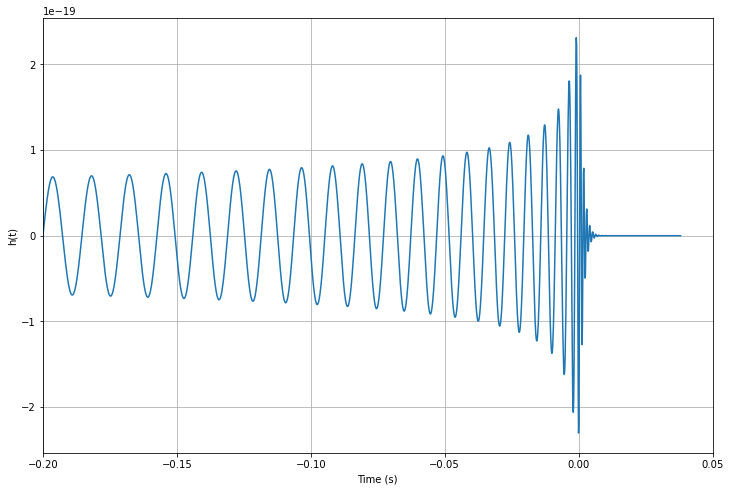

In [3]:
# The output of this function are the "plus" and "cross" polarizations of the gravitational-wave signal 
# as viewed from the line of sight at a given source inclination (assumed face-on if not provided)
hp1, _ = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/8192,
                         f_lower=20)

fig = pylab.figure(figsize=(12,8))
plt.plot(hp1.sample_times, hp1)
plt.xlabel('Time (s)')
plt.ylabel('h(t)')
plt.grid()
plt.show()

# Zoom in near the merger time#
fig2 = pylab.figure(figsize=(12,8))
plt.plot(hp1.sample_times, hp1)
plt.xlabel('Time (s)')
plt.ylabel('h(t)')
plt.xlim(-.2, .05)
plt.grid()
plt.show()

The merger occurs roughly at the time when the amplitude of the wave is maximized. Find the merger time for the waveform we plotted above. You can see that after the merger, the amplitude dies down very quickly. This part of the signal is called the "ringdown". At this point, the final remnant black hole leftover from the merger is ringing like a struck bell until it reaches equilibrium.

### How does the waveform change with the mass of the binary?

Below you can see how the length of the waveform increases for lower mass binary mergers. Here we write a for loop to generate waveforms for four different masses assuming the binary components have equal mass. What does it mean for the waveform length to increase for lower mass systems? How long is each waveform in seconds? What happens if you change the starting frequency, `f_lower`?

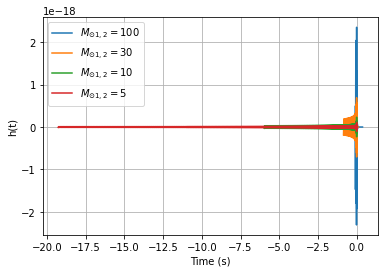

In [6]:
# Component mass of each binary component. We'll simplify here and assume that each 
# component of the binary has the same mass. Again, units are in solar masses.
for m in [100, 30, 10, 5]:
    hp, _ = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m,
                         mass2=m,
                         delta_t=1.0/8192,
                         f_lower=20)
    
    pylab.plot(hp.sample_times, hp, label='$M_{\odot 1,2}=%s$' % m)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.ylabel('h(t)')
pylab.show()

### Changing the distance of the waveform

The distance of the waveform is also selectable when you generate a waveform. The units used are Megaparsecs. This is $2\times 10^{11}$ times the distance between the Earth and the sun! There is a simple inverse relationship between distance and waveform amplitude, $A(f) \propto 1/d_{L}$. Does the length of the waveform change when you change the distance? Why?

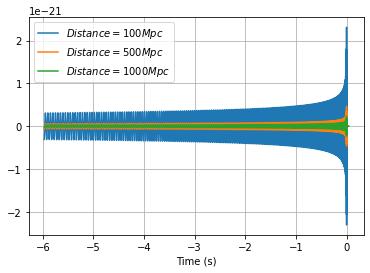

In [5]:
for d in [100, 500, 1000]:
    hp, _ = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/8192,
                         f_lower=20,
                         distance=d)
    
    pylab.plot(hp.sample_times, hp, label='$Distance=%sMpc$' % d)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.show()

### Exercise

Generate and plot the waveform associated to the binary neutron star merger GW170817. Look for the event name on [this list](https://www.gw-openscience.org/eventapi/html/allevents/) to retreive the estimated masses for this event. How long is the signal? Hint: You will need to use `delta_t = 1.0/16348`. What sampling rate does this imply for the signal? What Nyquist frequency? Why do we need to use a higher rate for this low-mass system?

Now generate the waveform for another binary neutron star merger. Assume it has the same total mass as GW170817, but set the masses so that `mass1 = 2*mass2`. Hint: set up an algebraic expression to solve for `mass2` given that you know the value of the total mass, `mass1 + mass2`. What are the resultant masses you should use? How does the waveform change compared to the one you plotted above? Plot them on the same graph to compare. You will need to zoom in very close to the merger time in order to see a significant difference. Which one has the bigger amplitude?